In [1]:
import sympy as sym

t, C = sym.symbols('t,C')
I_c = sym.Function('I_c')(t)
V_c = sym.Function('V_c')(t)
w = sym.Symbol('\omega')

eq=sym.Eq(I_c,C * sym.diff(V_c,t))
#I_c = C * sym.diff(V_c,t)

display(sym.simplify(eq.subs(V_c,sym.sin(w*t))))


Eq(I_c(t), C*\omega*cos(\omega*t))

In [2]:
from sympy.solvers import ode
#El voltaje a traves de un condensador de 40µF es de 25[V] en t=0. Si la corriente
# a traves del condensador es una funcion de tiempo dada por i(t)=6*exp(-6*t) mA para t>0
# encontrar v(t)

t, C = sym.symbols('t,C')
C = (40e-6)
Ic = sym.Function('Ic')(t)
Vc = sym.Function('Vc')(t)

Ic = sym.simplify(sym.exp(-6*t)*1e-3)

eq=sym.Eq(Ic,C*Vc.diff(t))
display(eq)

f = ode.dsolve(eq, hint='separable',ics={Vc.subs(t,0):25})
f

Eq(0.001*exp(-6*t), 4.0e-5*Derivative(Vc(t), t))

Eq(Vc(t), 29.1666666666667 - 4.16666666666667*exp(-6*t))

In [3]:
Vc=f.rhs
Wc=sym.Function('Wc')(t)
Wc=0.5*C*Vc**2
display(sym.simplify(Wc))

0.0170138888888889*(exp(6*t) - 0.142857142857143)**2*exp(-12*t)

In [4]:
#Ejemplo 7-6-1
# Encuentre la corriente de un inductor L = 0.1H cuando el voltaje a
#traves del inducor es V=10*t*exp(-5t)

t = sym.symbols('t')
L = (0.1)
Il = sym.Function('Il')(t)
Vl = sym.Function('Vl')(t)
Vl = sym.simplify(10*t*sym.exp(-5*t))
eq=sym.Eq(Vl,L*Il.diff(t))
display(eq)


f = ode.dsolve(eq, hint='separable',ics={Il.subs(t,0):0})
f

Eq(10*t*exp(-5*t), 0.1*Derivative(Il(t), t))

Eq(Il(t), -20.0*t*exp(-5*t) + 4.0 - 4.0*exp(-5*t))

In [5]:
Il=sym.simplify(f.rhs)
display(sym.simplify(Il))

(-20.0*t + 4.0*exp(5*t) - 4.0)*exp(-5*t)

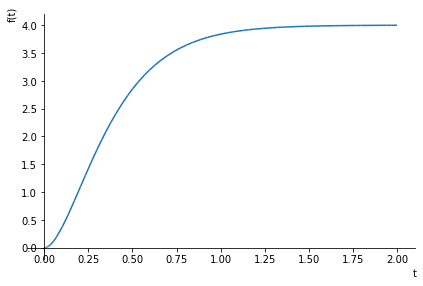

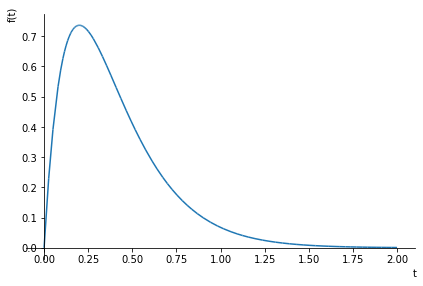

In [10]:
sym.plot(Il,(t,0,2))
sym.plot(Vl,(t,0,2))

In [7]:
## Circ de Opamp y ec dif lineal
t, K, a = sym.symbols('t, K, a')
x = sym.Function('x')(t)
y = sym.Function('y')(t)

eq = sym.Eq(2*sym.diff(y,t,3)+5*sym.diff(y,t,2)+4*sym.diff(y,t)+3*y,6*x)
display(eq)

f = ode.dsolve(eq.subs(x,K*sym.exp(-a*t)), y)
f

Eq(3*y(t) + 4*Derivative(y(t), t) + 5*Derivative(y(t), (t, 2)) + 2*Derivative(y(t), (t, 3)), 6*x(t))

Eq(y(t), C1*exp(t*(-10 + (6*sqrt(318) + 107)**(-1/3) + (6*sqrt(318) + 107)**(1/3))/12)*sin(sqrt(3)*t*(-(6*sqrt(318) + 107)**(1/3) + (6*sqrt(318) + 107)**(-1/3))/12) + C2*exp(t*(-10 + (6*sqrt(318) + 107)**(-1/3) + (6*sqrt(318) + 107)**(1/3))/12)*cos(sqrt(3)*t*(-(6*sqrt(318) + 107)**(1/3) + (6*sqrt(318) + 107)**(-1/3))/12) + C3*exp(t*(-(6*sqrt(318) + 107)**(1/3) - 5 - 1/(6*sqrt(318) + 107)**(1/3))/6) - 6*K*exp(-a*t)/(2*a**3 - 5*a**2 + 4*a - 3))

In [8]:
#RC Circuito
Vco, R, C, t = sym.symbols('Vco, R, C, t', real=True, positive=True)
Ic = sym.Function('Ic')(t)
Vc = sym.Function('Vc')(t)

eq=sym.Eq(Vco,R*C*sym.diff(Vc,t)+Vc)
display(eq)
f = ode.dsolve(eq, Vc,ics={Vc.subs(t,0):0})
f

Eq(Vco, C*R*Derivative(Vc(t), t) + Vc(t))

Eq(Vc(t), Vco - Vco*exp(-t/(C*R)))

In [11]:
#Si resolviera usando LAPLACE
t, s = sym.symbols('t, s')
def L(f):
    return sym.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sym.inverse_laplace_transform(F, s, t)

VC=Vco/(s*(C*R*s+1))
display(VC)
display(sym.simplify(invL(VC.apart(s))))


Vco/(s*(C*R*s + 1))

Vco*Heaviside(t) - Vco*exp(-t/(C*R))*Heaviside(t)